## 1.Imports of libraries


In [84]:
# Standard Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Acquisition and Analysis
import yfinance as yf  # For downloading market data
import pandas_ta as ta  # Technical Analysis library
import talib  # Additional Technical Analysis library

# Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


## 2.Load dataset

In [85]:
#Download historical price data for Bitcoin with yfinance library

df = yf.download(tickers='BTC-USD', period='7d', interval='1m')
df

C:\Users\Hamza\AppData\Local\Temp\ipykernel_27492\1111254444.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers='BTC-USD', period='7d', interval='1m')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-07-26 00:00:00+00:00,117625.382812,117625.382812,117625.382812,117625.382812,0
2025-07-26 00:02:00+00:00,117598.460938,117598.460938,117598.460938,117598.460938,0
2025-07-26 00:03:00+00:00,117571.320312,117571.320312,117571.320312,117571.320312,10600448
2025-07-26 00:04:00+00:00,117481.320312,117481.320312,117481.320312,117481.320312,0
2025-07-26 00:05:00+00:00,117482.695312,117482.695312,117482.695312,117482.695312,35586048
...,...,...,...,...,...
2025-08-01 16:44:00+00:00,115150.695312,115150.695312,115150.695312,115150.695312,142794752
2025-08-01 16:45:00+00:00,115369.703125,115369.703125,115369.703125,115369.703125,0


In [86]:
df

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-07-26 00:00:00+00:00,117625.382812,117625.382812,117625.382812,117625.382812,0
2025-07-26 00:02:00+00:00,117598.460938,117598.460938,117598.460938,117598.460938,0
2025-07-26 00:03:00+00:00,117571.320312,117571.320312,117571.320312,117571.320312,10600448
2025-07-26 00:04:00+00:00,117481.320312,117481.320312,117481.320312,117481.320312,0
2025-07-26 00:05:00+00:00,117482.695312,117482.695312,117482.695312,117482.695312,35586048
...,...,...,...,...,...
2025-08-01 16:44:00+00:00,115150.695312,115150.695312,115150.695312,115150.695312,142794752
2025-08-01 16:45:00+00:00,115369.703125,115369.703125,115369.703125,115369.703125,0


## 3.Features Engineering

In [87]:
#Flatten MultiIndex columns if present
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]

In [88]:
#Remove column Volume from df
df.drop(['Volume'], axis=1, inplace=True)

In [89]:
# Adding indicators

#Relative Strenght Index Indicator
df['RSI'] = df.ta.rsi(length=15)

#Exponential Moving Average over 13 periods(Short-Term)
df['EMAF'] = df.ta.ema(length=13)

#Exponential Moving Average over 13 periods(Medium-Term)
df['EMAM'] = df.ta.ema(length=50)

#Exponential Moving Average over 13 periods(Long-Term)
df['EMAS']=ta.ema(df.Close, length=200)


df['TargetNextClose'] = df['Close'].shift(-1)
df.dropna(inplace=True)

In [90]:
print(df.shape)

(8228, 9)


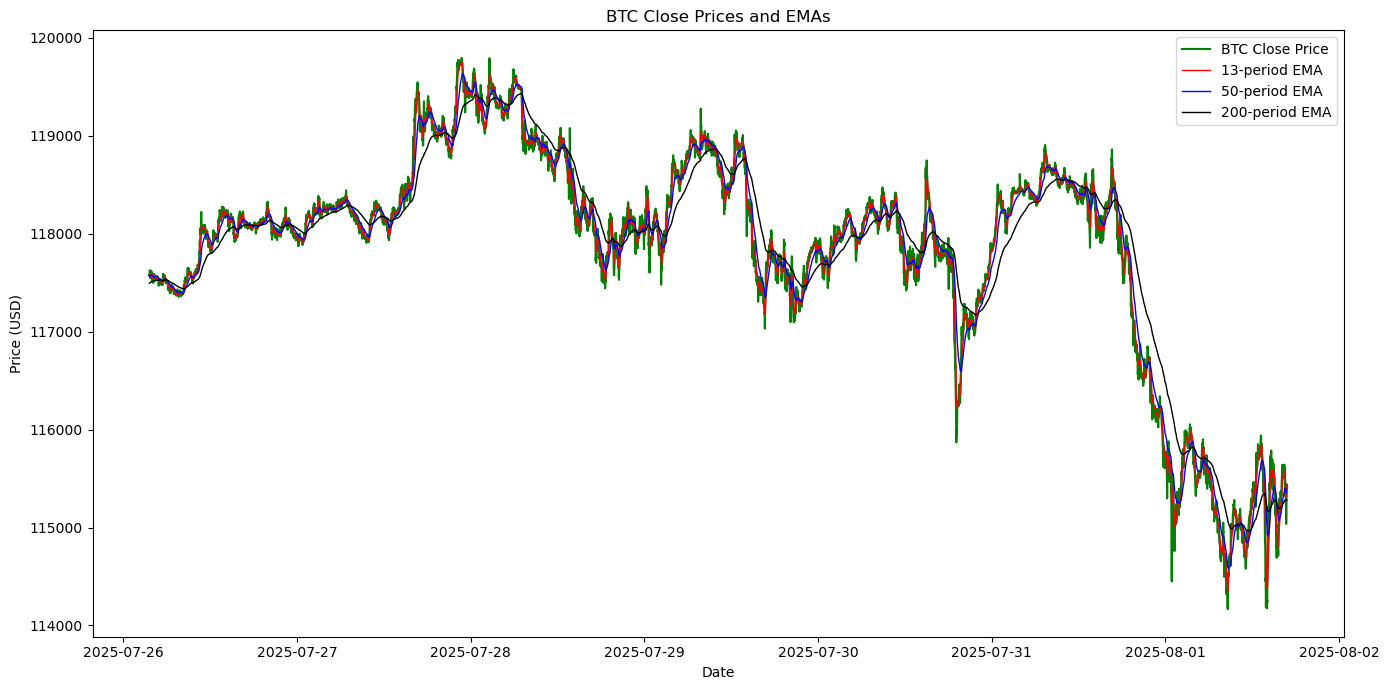

In [91]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='BTC Close Price', color='green', linewidth=1.5)
plt.plot(df.index, df['EMAF'], label='13-period EMA', color='red', linewidth=1)
plt.plot(df.index, df['EMAM'], label='50-period EMA', color='blue', linewidth=1)
plt.plot(df.index, df['EMAS'], label='200-period EMA', color='black', linewidth=1)
plt.title('BTC Close Prices and EMAs')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

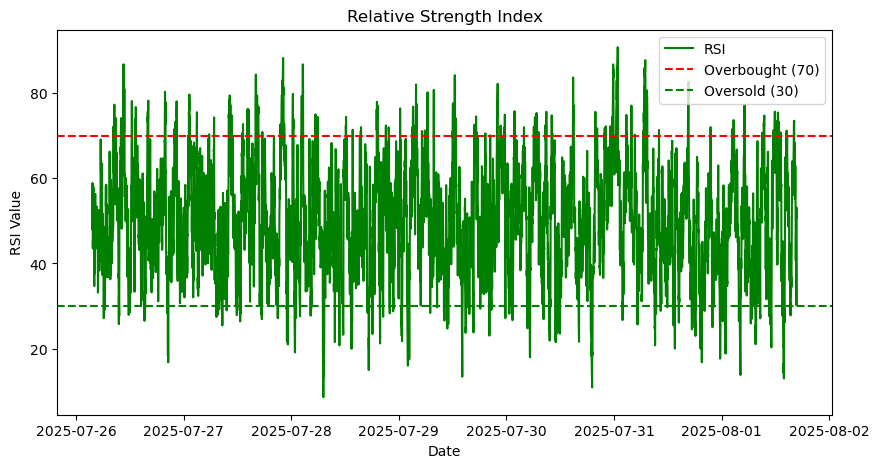

In [92]:
# Plot the RSI indicator
plt.figure(figsize=(10, 5))  # New figure for RSI


plt.plot(df['RSI'], label='RSI', color='green')

# Overbought line (70)
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)') 
 # Oversold line (30)
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)') 

#Assign labels
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI Value')

plt.legend()
plt.show()

In [93]:
#Double check if any row still contains a missing values
df.isnull().sum()

Close              0
High               0
Low                0
Open               0
RSI                0
EMAF               0
EMAM               0
EMAS               0
TargetNextClose    0
dtype: int64

## 4.Scale the data

In [94]:
#Scale/Normalize the features using MinMax(0,1) and convert to dataframe

scaler = MinMaxScaler()
features = ['Open', 'High', 'Low', 'Close', 'RSI', 'EMAF', 'EMAM', 'EMAS']
df_scaled = scaler.fit_transform(df[features + ['TargetNextClose']])
df_scaled = pd.DataFrame(df_scaled, columns=features + ['TargetNextClose'])


## 5.Function: Create Sequences for LSTM Model

In [95]:
#Prepares Sequential Data for Time Series Forecasting

def create_sequences(df_scaled, sequence_length):
    X, y = [], []
    for i in range(len(df_scaled) - sequence_length):
        X.append(df_scaled.iloc[i:(i + sequence_length)][features].values)
        y.append(df_scaled.iloc[i + sequence_length]['TargetNextClose'])
    return np.array(X), np.array(y)
#window size 
sequence_length = 4

X, y = create_sequences(df_scaled, sequence_length)

## 6.Data Partitioning: 80-10-10 Split
## Splitting the Data into Training, Validation, and Testing Sets



In [96]:
#Data partioning 80-10-10

#Assign the sizes
train_size = int(X.shape[0] * 0.8)
val_size = int(X.shape[0] * 0.1)
test_size = X.shape[0] - train_size - val_size

#Data for training
X_train, y_train = X[:train_size], y[:train_size]
#Data for validation
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
#Data for testing
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

# Print the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (6579, 4, 8)
Shape of y_train: (6579,)
Shape of X_val: (822, 4, 8)
Shape of y_val: (822,)
Shape of X_test: (823, 4, 8)
Shape of y_test: (823,)


## 7. Build LSTM Model with Dropout

In [97]:
#1.Build LSTM model
def build_model():
    model = Sequential([
        
        #first layer with 32 units that return sequences for further layers, and accepts input shaped as (sequence_length, number of features) 
        LSTM(32, input_shape=(sequence_length, len(features)), return_sequences=True),
        
        # Dropout for regularization
        Dropout(0.2), 
        
        #Second laayers with 32 units with no sequence, output only last hidden ones
        LSTM(32, return_sequences=False),
        
        # Dropout for regularization
        Dropout(0.2),  
        
        # Output layer with 1 output unit
        Dense(1)  
    ])
    
    #Compile the model and adam as optimizer and mse as loss
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = build_model()

In [98]:
# 2. Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 32)             5248      
                                                                 
 dropout_2 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,601
Trainable params: 13,601
Non-trainable params: 0
_________________________________________________________________


## 8. Train the Model


In [99]:
#3. Train the model

#Stop the training when val_loss is not improving after 10 epochs 
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Train the model 
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/40
206/206 [==============================] - 12s 19ms/step - loss: 0.0285 - val_loss: 0.0021
Epoch 2/40
206/206 [==============================] - 2s 9ms/step - loss: 0.0064 - val_loss: 0.0012
Epoch 3/40
206/206 [==============================] - 2s 9ms/step - loss: 0.0056 - val_loss: 0.0013
Epoch 4/40
206/206 [==============================] - 2s 10ms/step - loss: 0.0049 - val_loss: 7.0670e-04
Epoch 5/40
206/206 [==============================] - 2s 10ms/step - loss: 0.0044 - val_loss: 7.8257e-04
Epoch 6/40
206/206 [==============================] - 2s 9ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 7/40
206/206 [==============================] - 2s 9ms/step - loss: 0.0038 - val_loss: 5.3652e-04
Epoch 8/40
206/206 [==============================] - 2s 8ms/step - loss: 0.0033 - val_loss: 5.3618e-04
Epoch 9/40
206/206 [==============================] - 2s 9ms/step - loss: 0.0031 - val_loss: 4.5335e-04
Epoch 10/40
206/206 [==============================] - 2s 9ms/step - loss: 0

## 9.Evaluation of the model

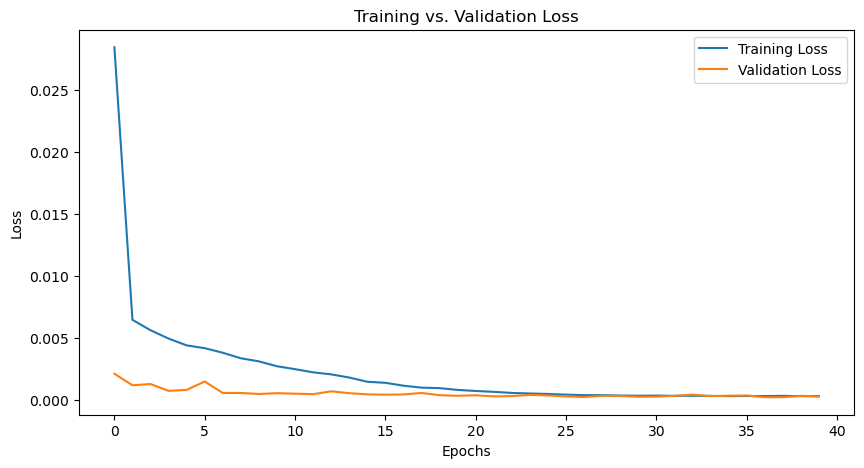

In [100]:
# 4. Plot training loss vs. validation loss

plt.figure(figsize=(10, 5))

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Standard linear scale for y-axis
plt.title('Training vs. Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [101]:
# 5. Evaluate the model on the test data

test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

26/26 [==============================] - 0s 4ms/step - loss: 0.0056
Test Loss: 0.005597313400357962


In [102]:
# 6.Prediction on validation and test sets
val_predictions = model.predict(X_val)

#Flatt the prediction in a one dimentional array for metrics analysis
val_predictions = val_predictions.flatten()


26/26 [==============================] - 2s 3ms/step


In [103]:
# 7. Calculate validation metrics

val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mape = np.mean(np.abs((y_val - val_predictions) / y_val)) * 100
val_r2 = r2_score(y_val, val_predictions)

print(f"Validation MSE: {val_mse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation MAE: {val_mae}")
print(f"Validation MAPE: {val_mape}%")
print(f"Validation R-squared: {val_r2}")


Validation MSE: 0.00024825195064266605
Validation RMSE: 0.01575601315824108
Validation MAE: 0.011465541957627818
Validation MAPE: 2.031229872632568%
Validation R-squared: 0.9874988189225694


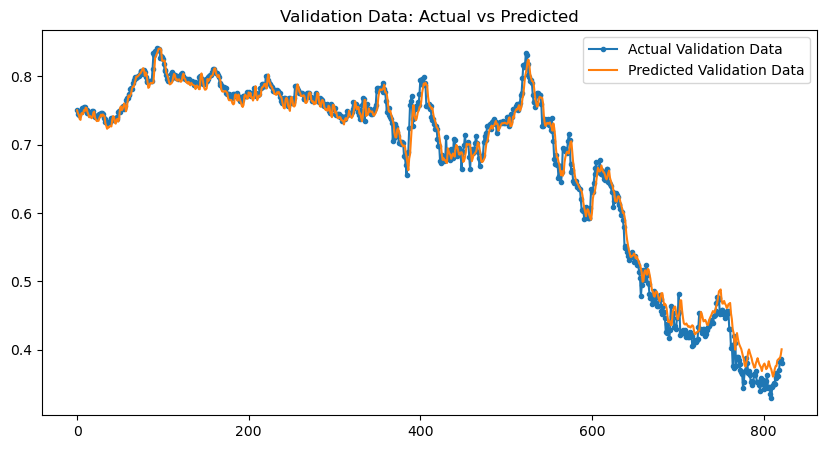

In [104]:
#8.Plot the validation data

plt.figure(figsize=(10, 5))
plt.plot(y_val,marker = '.', linestyle='-', label='Actual Validation Data')
plt.plot(val_predictions, label='Predicted Validation Data')
plt.title('Validation Data: Actual vs Predicted')
plt.legend()
plt.show()

In [105]:
#9.Predictions for the test data
test_predictions = model.predict(X_test)

#Flatt the prediction in a one dimentional array for metrics analysis
test_predictions = test_predictions.flatten() 

26/26 [==============================] - 0s 3ms/step


In [106]:
# 10.Calculation of Testing metrics

#Test metrics
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100
test_r2 = r2_score(y_test, test_predictions)

# Print metrics for testing evaluation
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}%")
print(f"Test R-squared: {test_r2}")



Test MSE: 0.0055973132635348186
Test RMSE: 0.0748151940686838
Test MAE: 0.06916523470388493
Test MAPE: inf%
Test R-squared: 0.013014726977841895


C:\Users\Hamza\AppData\Local\Temp\ipykernel_27492\2933564953.py:7: RuntimeWarning: divide by zero encountered in divide
  test_mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100


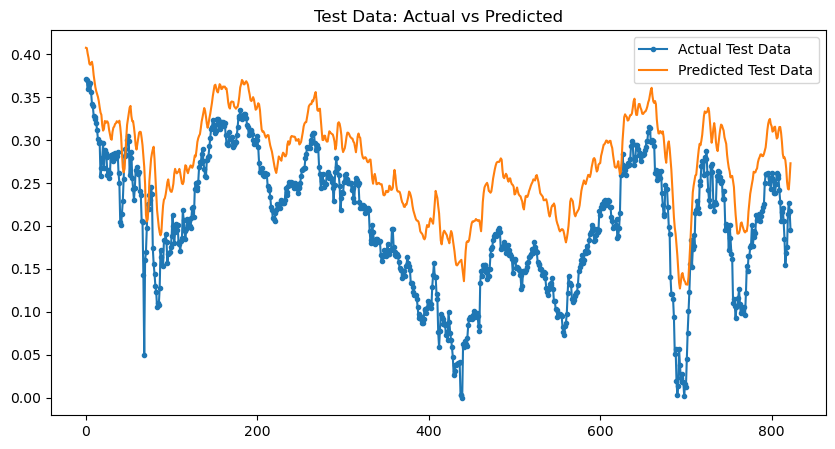

In [107]:
# 11.Plot the Test data

plt.figure(figsize=(10, 5))

plt.plot(y_test, marker='.', label='Actual Test Data')
plt.plot(test_predictions, label='Predicted Test Data')

plt.title('Test Data: Actual vs Predicted')

plt.legend()
plt.show()